# Playground for the Logistic Population Model



## Imports and definitions

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from scipy.integrate import solve_ivp

In [2]:
def plot_slope_field(t_bounds, x_bounds, f, ivs=None):

  inv_norm = lambda t,x: 1/np.sqrt(f(t,t)**2+1)
  f_norm = lambda t,x: f(x,t)*inv_norm(t,x)

  T, X = np.meshgrid(np.arange(*t_bounds), np.arange(*x_bounds))
  U, V = inv_norm(X,T), f_norm(X,T)

  fig = plt.figure(figsize = (12, 7))
  Q = plt.quiver(T, X, U, V, np.abs(V), units='width')
  qk = plt.quiverkey(Q, 0.9, 0.9, 2, label="m/s", coordinates='figure')
  
  plt.xlabel("t")
  plt.ylabel("x")
  plt.xlim(*t_bounds[0:2])
  plt.ylim(*x_bounds[0:2])

  if ivs is not None:
    if not isinstance(ivs, list):
      ivs = [ivs]
    t = np.arange(*t_bounds)
    for iv in ivs:
      y0 = np.array([iv])
      y0.reshape(1,)
      sol = solve_ivp(fun=f, t_span=t_bounds[0:2], y0=y0, dense_output=True)
      plt.plot(t, sol.sol(t)[0])

  plt.show()


## Main Playground

In [3]:
def ex1(a):
  return lambda t,x: a * x

def ex2(a):
  return lambda t,x: a * x * (1- x)

def ex3():
  return lambda t,x: x * (1- x**2)

def ex4(a, h):
  return lambda t,x: a * x * (1- x) - h

def ex5(a, h):
  return lambda t,x: a * x * (1- x) - h*(1 + np.sin(2*np.pi*t))

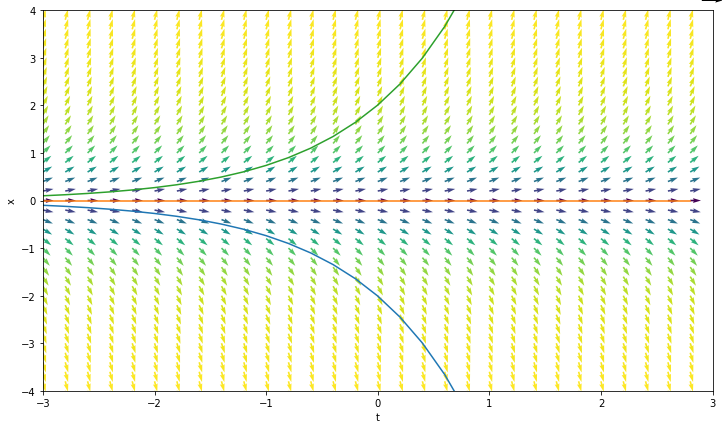

In [4]:
t_bounds = (-3, 3, .2)
x_bounds = (-4, 4, .2)
plot_slope_field(t_bounds, x_bounds, ex1(1), [-0.1, 0, 0.1])